In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [45]:
%matplotlib notebook

In this section, you’ll create a dataset of wine prices based on a simple artificial model.
The prices are based on a combination of the rating and the age of the wine. The
model assumes that wine has a peak age, which is older for good wines and almost
immediate for bad wines. A high-rated wine will start at a high price and increase in
value until its peak age, and a low-rated wine will start cheap and get cheaper.

In [7]:
from random import random,randint
import math

def wineprice(rating,age):
    peak_age=rating-50
    # Calculate price based on rating
    price=rating/2
    if age>peak_age:
        # Past its peak, goes bad in 5 years
        price=price*(5-(age-peak_age))
    else:
        # Increases to 5x original value as it
        # approaches its peak
        price=price*(5*((age+1)/peak_age))
    if price<0: price=0
    return price

You’ll also need a function to build a dataset of wine prices. The following function
generates 200 bottles of wine and calculates their prices from the model. It then randomly
adds or subtracts 20 percent to capture things like taxes and local variations
in prices, and also to make the numerical prediction a bit more difficult.

In [3]:
def wineset1( ):
    rows=[]
    for i in range(300):
        # Create a random age and rating
        rating=random( )*50+50
        age=random( )*50
        # Get reference price
        price=wineprice(rating,age)
        # Add some noise
        price*=(random( )*0.4+0.8)
        # Add to the dataset
        rows.append({'input':(rating,age),
        'result':price})
    return rows

In [8]:
wineprice (95.0,3.0)

21.111111111111114

In [10]:
wineprice(95.0,8.0)

47.5

In [12]:
wineprice(99.0,1.0)

10.102040816326529

In [14]:
data=wineset1( )

In [15]:
data[0]

{'input': (93.05961680091625, 8.762733711597853), 'result': 57.175361020615874}

In [16]:
data[1]

{'input': (80.44370633285627, 13.94333292433181), 'result': 87.20051345562983}

The easiest approach to our wine pricing problem is the same one you would use if
you were trying to price something manually—that is, to find a few of the most
similar items and assume the prices will be roughly the same. By finding a set of
items similar to the item that interests you, the algorithm can average their prices
and make a guess at what the price should be for this item. This approach is called
k-nearest neighbors (kNN).

In [26]:
data[0]["input"],data[1]["input"]

((93.05961680091625, 8.762733711597853),
 (80.44370633285627, 13.94333292433181))

In [24]:
def euclidean(v1,v2):
    d=0.0
    for i in range(len(v1)):
        d+=(v1[i]-v2[i])**2
    return math.sqrt(d)

In [25]:
euclidean(data[0]['input'],data[1]['input'])

13.638174553109558

In [39]:
result = [v["result"] for v in data ]


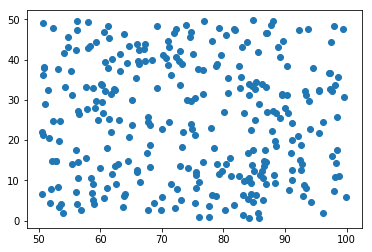

In [34]:
rating = [v["input"][0] for v in data ]
age = [v["input"][1] for v in data ]
plt.scatter(rating,age)

<IPython.core.display.Javascript object>


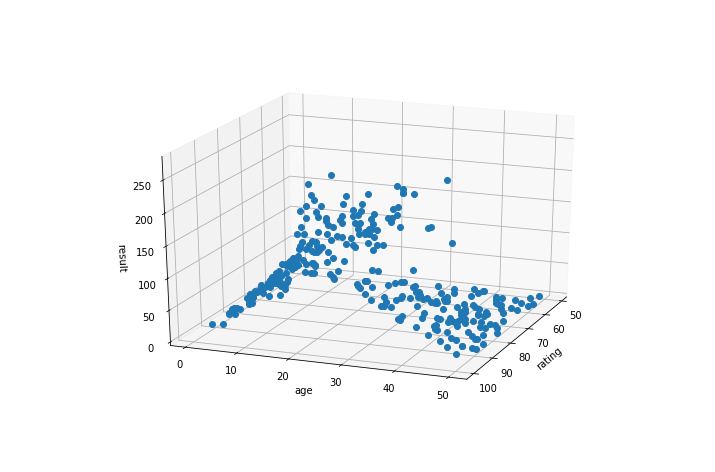

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Silly example data
X =rating
Y =age
Z =result 

# Make the plot
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot3D(X,Y,Z,'o') 
#ax.set_zlim(-1.01, 1.01)
ax.set_xlabel("rating")
ax.set_ylabel("age")
ax.set_zlabel("result")
plt.show()